Experiment 1 with IAM dataset
============================================

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
import time
import os
from utils import *
from classes import *

use_gpu = torch.cuda.is_available()

print('main imports complete')

main imports complete


In [2]:
# ========================================
# Step 1. define data transform
#
# Including different forms of data augmentation
# One will include nearly all types (excluding random crops, etc. that may remove handwriting.)
# The other will include a selected set of augmentations
# Keeping 'train', 'val', and 'test' transforms just in case we want to include different functionalities
# ========================================

# Need the __name__ check to make multiprocessing work on Windows for some reason
# if __name__ == '__main__':
print("Set up data transforms.")
img_input_size = 56

selected_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # RandomRotation does not seem to be working on Windows right now
        transforms.RandomRotation(45),

        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5),
        transforms.RandomGrayscale(p=0.1),

        transforms.Grayscale(), # not sure why the current input is not grayscale, do grayscale conversion
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    # should not do random transformation in val or test set
    'val': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
}

net1_data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

# data_transforms = selected_transforms
data_transforms = net1_data_transforms


Set up data transforms.


In [3]:
all_data_dir = '/home/rahul/data/handwriting/sampled/dim64x64-stride8x8/train_val_test'
set_types = ['train', 'val', 'test']

imagefolders = {t : datasets.ImageFolder(os.path.join(all_data_dir, t),
                                        transform = data_transforms[t])
               for t in set_types}
for t in set_types:
    print(str(t) + ' count:', len(imagefolders[t]))

train count: 12138
val count: 4042
test count: 4178


device_name cuda
Creating Net1.

Epoch 0/49
----------
Phase:train
average loss: 0.2163648725582281
f1_pos: 0.9085616438356164
f1_neg: 0.9152111781517943

Phase:val
average loss: 0.7923249511775375
f1_pos: 0.6595246066287245
f1_neg: 0.8004708652148322


Epoch 1/49
----------
Phase:train
average loss: 0.13999411492157482
f1_pos: 0.9397527876220936
f1_neg: 0.9451483434327534

Phase:val
average loss: 7.853793978514145
f1_pos: 0.012903225806451613
f1_neg: 0.6722689075630253


Epoch 2/49
----------
Phase:train
average loss: 0.12919150963536125
f1_pos: 0.951064754454585
f1_neg: 0.9559157466134208

Phase:val
average loss: 1.3059901222033645
f1_pos: 0.6264150943396226
f1_neg: 0.7893209518282065


Epoch 3/49
----------
Phase:train
average loss: 0.11114333113933203
f1_pos: 0.9511603740907517
f1_neg: 0.9556882463859209

Phase:val
average loss: 0.08343183899455911
f1_pos: 0.9688385269121813
f1_neg: 0.9711973339681027


Epoch 4/49
----------
Phase:train
average loss: 0.11441798918691926
f1_pos: 0.9

Phase:train
average loss: 0.07883456155650402
f1_pos: 0.9700188452972417
f1_neg: 0.9722266306935406

Phase:val
average loss: 2.6333051607904903
f1_pos: 0.7732715334105832
f1_neg: 0.5960082587749483


Epoch 38/49
----------
Phase:train
average loss: 0.0786545026828261
f1_pos: 0.9687607277720562
f1_neg: 0.9711660329531051

Phase:val
average loss: 0.06832323910254673
f1_pos: 0.9793525363242417
f1_neg: 0.980533525594809


Epoch 39/49
----------
Phase:train
average loss: 0.08308720736922277
f1_pos: 0.968699082411457
f1_neg: 0.9710661910424099

Phase:val
average loss: 0.4022185606775987
f1_pos: 0.8877777777777778
f1_neg: 0.9099018733273863


Epoch 40/49
----------
Phase:train
average loss: 0.07979318535592683
f1_pos: 0.9675319112481795
f1_neg: 0.9699277949694517

Phase:val
average loss: 1.926450821623125
f1_pos: 0.5268579838116262
f1_neg: 0.7603428997390981


Epoch 41/49
----------
Phase:train
average loss: 0.08303956153148392
f1_pos: 0.9661570176945543
f1_neg: 0.96881431059047

Phase:val
av

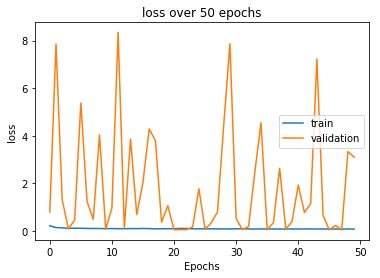

Average Training Score: 0.09378042701976369
Average Validation Score: 1.8513058343932394


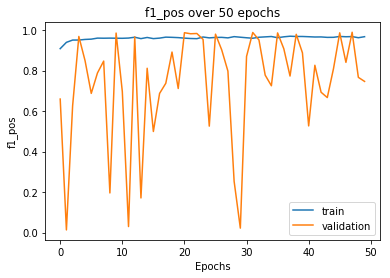

Average Training Score: 0.961485376775938
Average Validation Score: 0.7383115575329476


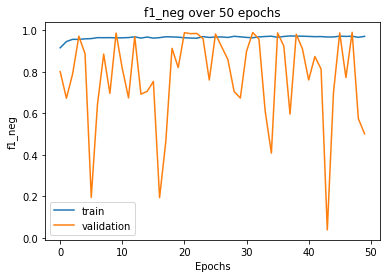

Average Training Score: 0.9646374163608077
Average Validation Score: 0.7720741553743993
Wrote metrics to 'net1-IAM-raw_logs/all_metrics.csv'



In [4]:
from model_utils import create_model_architecture
from train_utils import train

use_gpu = True
device_name = 'cuda' if use_gpu else 'cpu'
print('device_name', device_name)

batch_size = 100

phases = ['train', 'val']
metric_types = ['loss', 'tn', 'fp', 'fn', 'tp', 'f1_pos', 'f1_neg']
metric_types_plot = ['loss', 'f1_pos', 'f1_neg']
metric_names_all = [p+'-'+m for p in phases for m in metric_types]
metric_names_plot = [p+'-'+m for p in phases for m in metric_types_plot]

all_metrics = {metric : [] for metric in metric_names_all}

num_training_epochs = 50

data_loaders = {t : torch.utils.data.DataLoader(imagefolders[t], batch_size = batch_size, shuffle = True, num_workers = 4)
                for t in phases}

model = create_model_architecture('net1', use_gpu = use_gpu)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, train_metrics = train(model,
                                     criterion,
                                     optimizer,
                                     data_loaders['train'],
                                     data_loaders['val'],
                                     num_epochs=num_training_epochs,
                                     use_gpu = use_gpu)

all_metrics = train_metrics

for metric in metric_types_plot:
    plot_values(all_metrics['train-' + str(metric)],
               all_metrics['val-' + str(metric)],
               str(metric) + " over " + str(num_training_epochs) + " epochs",
               ylabel = str(metric))

# write metrics to file
write_metrics_to_csv(all_metrics, metric_names_all, 'net1-IAM-raw_logs', 'all_metrics.csv')

print()
